**Postech IA para Devs - Fase 5**

Hackathon

Grupo 4:


*   Marcos Carielo - rm357969
*   Priscila Nitta - rm357392
*   Renato Mello - rm357879
*   Vitor Soares - rm356986

# Documentação

**FIAP VisionGuard — Detecção de Objetos Cortantes com IA**

**Objetivos**
* Construir ou buscar um dataset contendo imagens de facas, tesouras e
outros objetos cortantes em diferentes condições de ângulo e
iluminação;
* Anotar o dataset para treinar o modelo supervisionado;
* Treinar o modelo;
* Desenvolver um sistema de alertas (pode ser um e-mail).

---

**Fluxo da Solução**

1. Obtenção do dataset anotado
2. Configuração do ambiente e ferramentas
3. Treinamento do modelo de detecção
5. Desenvolvimento de sistema de alerta por e-mail

---

**1. Obtenção do Dataset**

O dataset foi obtido gratuitamente por meio da plataforma [Roboflow](https://roboflow.com), já anotado no formato YOLOv5.

O conjunto de dados inclui:

- Imagens com objetos cortantes (facas, tesouras, estiletes, etc.)
- Diversas condições de iluminação e ângulos
- Labels organizados por pastas (imagens e anotações separadas)

---

**2. Configuração do Ambiente**

A solução foi desenvolvida na plataforma **Google Colab**, utilizando:

- Framework YOLOv5 (Ultralytics)
- Linguagem Python
- Dependências instaladas diretamente no ambiente Colab
- Dataset importado manualmente

**O que é o YOLOv5?**

YOLOv5 é um modelo de detecção de objetos em tempo real desenvolvido pela Ultralytics. Ele é baseado na arquitetura YOLO (You Only Look Once), que realiza detecção de objetos de forma rápida e eficiente com apenas uma passada pela imagem.

YOLOv5 é escrito em PyTorch e é fácil de treinar, adaptar e implantar em diferentes cenários, incluindo dispositivos com recursos limitados.

**Modelos disponíveis no YOLOv5**

O YOLOv5 possui diferentes tamanhos de modelo, que equilibram velocidade e precisão:

| Modelo   | Tamanho  | Velocidade | Precisão | Uso recomendado                    |
|----------|----------|------------|---------------------|-------------------------------------|
| `yolov5n` | Nano     | Muito rápida | Média              | Dispositivos com pouca capacidade  |
| `yolov5s` | Small    | Rápida      | Boa                | Aplicações em tempo real           |
| `yolov5m` | Medium   | Média       | Muito boa          | Compromisso entre desempenho e precisão |
| `yolov5l` | Large    | Mais lenta  | Excelente          | Alta precisão com boas GPUs        |
| `yolov5x` | XLarge   | Mais lenta  | Máxima             | Quando a precisão é prioridade     |


---

**3. Treinamento do Modelo**

O modelo foi treinado com base na arquitetura YOLOv5 (versão pequena — `yolov5s`), aproveitando pesos pré-treinados como ponto de partida.

Parâmetros de treinamento:

- Tamanho da imagem: 640x640 pixels
- Número de épocas: 100
- Lote (batch): 16
- Três classes: faca, tesoura e cortador
- Divisão do dataset: treino e validação

O arquivo de configuração (`sharp-data.yaml`) foi ajustado com os caminhos para as imagens e nomes das classes.

---

**5. Sistema de Alerta por E-mail**

Foi implementado um sistema simples de envio de e-mails para alerta imediato da central de segurança.

Esse sistema é acionado sempre que o modelo detectar a presença de um objeto cortante na imagem.

A configuração do envio de e-mails foi feita com SMTP, utilizando uma conta de e-mail com autenticação segura.

---

**6. Conclusão**

Este MVP demonstrou que é viável implementar uma solução baseada em IA para detecção automática de objetos cortantes com boa precisão, utilizando recursos gratuitos.

O sistema pode ser expandido com:

- Mais dados de treinamento (incluindo gravações reais de câmeras de segurança)
- Detecção em tempo real com webcam ou stream
- Integração com um painel de controle para operadores de segurança

---

**Ferramentas Utilizadas**

- Google Colab
- Roboflow (para obter e anotar datasets)
- Ultralytics YOLOv5
- Python (com bibliotecas de IA e e-mail)


# Inclusão de Dependencias

In [1]:
import torch
import cv2
import time
import numpy as np
from datetime import datetime
from google.colab.patches import cv2_imshow
import zipfile
import os
import smtplib
from email.message import EmailMessage
import imghdr
import warnings

warnings.filterwarnings("ignore", category=FutureWarning)

<ipython-input-1-30c3788849fd>:11: DeprecationWarning: 'imghdr' is deprecated and slated for removal in Python 3.13
  import imghdr


In [2]:
#Caminho do arquivo zip
zip_path = '/content/model.zip'
#Pasta de destino
extract_path = '/content/'
#Descompactar
with zipfile.ZipFile(zip_path, 'r') as zip_ref:
    zip_ref.extractall(extract_path)

print("Arquivo descompactado com sucesso!")

Arquivo descompactado com sucesso!


# Treinamento do Modelo

In [5]:
!pip install --upgrade --quiet torch torchvision torchaudio --index-url https://download.pytorch.org/whl/cu118


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 23.2/23.2 MB 50.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 875.6/875.6 kB 37.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.1/13.1 MB 71.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 663.9/663.9 MB 2.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 417.9/417.9 MB 4.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 168.4/168.4 MB 6.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 58.1/58.1 MB 12.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 128.2/128.2 MB 7.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 204.1/204.1 MB 4.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 147.8/147.8 MB 6.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 99.1/99.1 kB 7.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 955.6/955.6 MB 1.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━

In [ ]:
%cd /content/model/yolov5

/content/model/yolov5


In [ ]:
# Treinamento do Modelo
!python train.py --img 640 --batch 16 --epochs 100 --data sharp-data.yaml --weights yolov5s.pt --cache

A saída de streaming foi truncada nas últimas 5000 linhas.
      84/99       4.5G    0.01845    0.01072   0.004641         34        640:  95% 155/163 [00:44<00:01,  4.16it/s]/content/drive/MyDrive/models/yolov5/train.py:412: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with torch.cuda.amp.autocast(amp):
      84/99       4.5G    0.01841    0.01071   0.004624         35        640:  96% 156/163 [00:44<00:01,  4.13it/s]/content/drive/MyDrive/models/yolov5/train.py:412: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with torch.cuda.amp.autocast(amp):
      84/99       4.5G    0.01841     0.0107    0.00461         42        640:  96% 157/163 [00:45<00:01,  4.22it/s]/content/drive/MyDrive/models/yolov5/train.py:412: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instea

# Implementação

In [3]:
model = torch.hub.load('ultralytics/yolov5', 'custom', path='/content/model/yolov5/runs/train/exp3/weights/best.pt', force_reload=True)

/usr/local/lib/python3.11/dist-packages/torch/hub.py:330: UserWarning: You are about to download and run code from an untrusted repository. In a future release, this won't be allowed. To add the repository to your trusted list, change the command to {calling_fn}(..., trust_repo=False) and a command prompt will appear asking for an explicit confirmation of trust, or load(..., trust_repo=True), which will assume that the prompt is to be answered with 'yes'. You can also use load(..., trust_repo='check') which will only prompt for confirmation if the repo is not already trusted. This will eventually be the default behaviour
  warnings.warn(
Downloading: "https://github.com/ultralytics/yolov5/zipball/master" to /root/.cache/torch/hub/master.zip


Creating new Ultralytics Settings v0.0.6 file ✅ 
View Ultralytics Settings with 'yolo settings' or at '/root/.config/Ultralytics/settings.json'
Update Settings with 'yolo settings key=value', i.e. 'yolo settings runs_dir=path/to/dir'. For help see https://docs.ultralytics.com/quickstart/#ultralytics-settings.


YOLOv5 🚀 2025-4-22 Python-3.11.12 torch-2.6.0+cu124 CPU

Fusing layers... 
Model summary: 157 layers, 7023610 parameters, 0 gradients, 15.8 GFLOPs
Adding AutoShape... 


In [ ]:
def send_email(body, image_path):
    msg = EmailMessage()
    msg['Subject'] = 'Alerta de Segurança - Detecção de Objeto Cortante'
    msg['From'] = 'sistema@visionguard.com'
    msg['To'] = 'visionguard@maildrop.cc'
    msg.set_content(body)

    # Anexar imagem
    with open(image_path, 'rb') as img_file:
        img_data = img_file.read()
        img_type = imghdr.what(img_file.name)
        img_name = os.path.basename(img_file.name)
        msg.add_attachment(img_data, maintype='image', subtype=img_type, filename=img_name)

    # --- Envio de e-mail (comentado para evitar execução automática) ---
    #
    # O trecho abaixo está comentado propositalmente porque utiliza o Mailtrap,
    # uma ferramenta gratuita utilizada exclusivamente para testes de envio de e-mails.
    #
    # Mailtrap fornece uma caixa de entrada falsa para capturar e visualizar e-mails sem que eles
    # sejam enviados a destinatários reais. Essa configuração é temporária e foi usada apenas para testes.
    #
    # O código foi comentado para que o avaliador possa executar o restante do notebook sem problemas,
    # já que esse envio de e-mail exigiria credenciais e conectividade específicas.
    #
    # No final do notebook há uma evidência de que o envio de e-mails foi realizado com sucesso usando esse código.
    #
    # Este trecho é funcional: para utilizá-lo, basta descomentar e inserir configurações reais e válidas
    # de servidor SMTP, login e senha para que o envio ocorra corretamente.
    #
    #with smtplib.SMTP("sandbox.smtp.mailtrap.io", 2525) as smtp:
    #    smtp.starttls()
    #    smtp.login("9255552ad395dd", "5fcb1b5afa7664")
    #    smtp.send_message(msg)

# Vídeo
video_path = '/content/video.mp4'
cap = cv2.VideoCapture(video_path)

# Histórico de objetos detectados
previous_centers = []
min_distance = 50  # distância mínima entre ocorrências para considerar objeto diferente

frame_id = 0
occurrence_id = 0

def is_new_occurrence(center, previous_centers):
    for pc in previous_centers:
        distance = np.linalg.norm(np.array(center) - np.array(pc))
        if distance < min_distance:
            return False
    return True

while cap.isOpened():
    success, frame = cap.read()
    if not success:
        break

    frame_id += 1
    results = model(frame)

    for *box, conf, cls in results.xyxy[0]:
        label = model.names[int(cls)]
        score = float(conf)

        if any(keyword in label.lower() for keyword in ['cutter', 'knife', 'scissor']):
            x1, y1, x2, y2 = [int(coord) for coord in box]
            cx, cy = (x1 + x2) // 2, (y1 + y2) // 2

            if is_new_occurrence((cx, cy), previous_centers):
                occurrence_id += 1
                previous_centers.append((cx, cy))
                timestamp = datetime.now().strftime("%Y-%m-%d %H:%M:%S")
                print(f"[{timestamp}] Ocorrência #{occurrence_id}: '{label}' detectado com {score:.2f} de confiança (frame {frame_id})")
                 # Renderizar frame anotado
                annotated = results.render()[0]
                # Salvar imagem temporária
                image_filename = f"/content/occurrence_{occurrence_id}.jpg"
                cv2.imwrite(image_filename, annotated)
                # Mostrar no notebook
                cv2_imshow(annotated)
                # Enviar e-mail
                body = f"Ocorrência #{occurrence_id}: '{label}' detectado com {score:.2f} de confiança (frame {frame_id}) às {timestamp}"
                send_email(body, image_filename)

cap.release()

# Evidência de e-mail enviado com sucesso

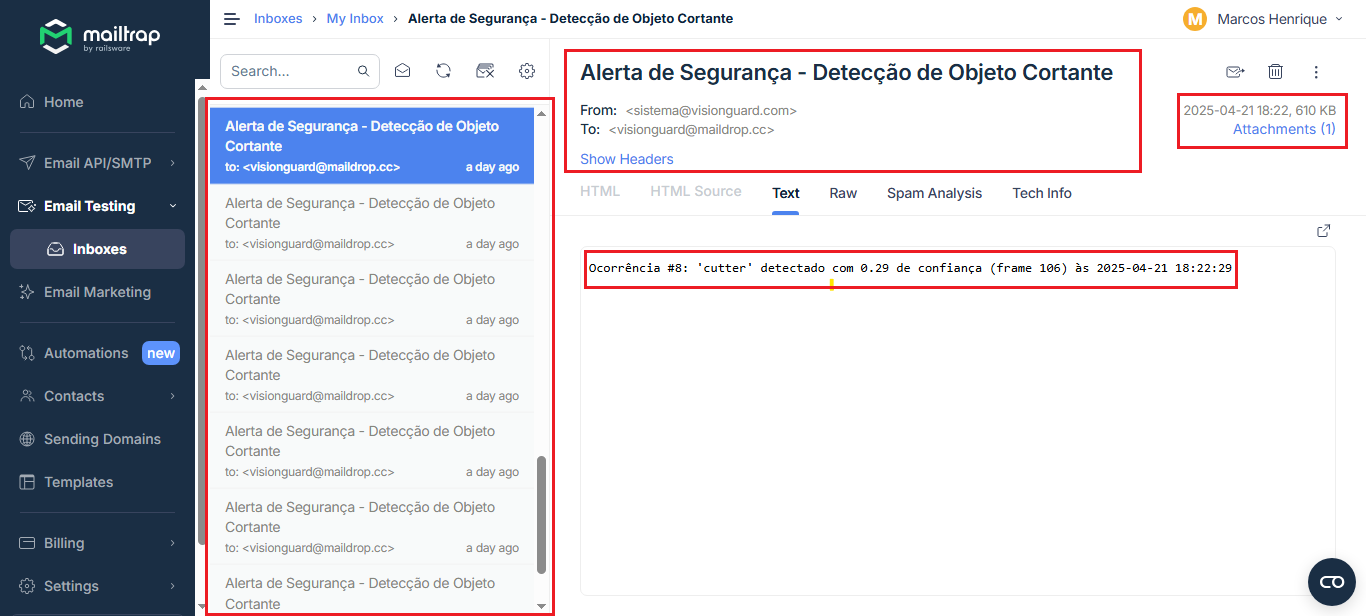

# **Desafios**

Devido à limitação de tempo, optamos por utilizar um dataset pronto em vez de desenvolver um próprio. No entanto, enfrentamos dificuldades em localizar conjuntos de dados prontos que atendessem especificamente à finalidade desejada, já que muitos continham apenas imagens de facas de um único tipo, o que poderia comprometer a detecção de facas maiores ou com formatos distintos. Além disso, notamos a ausência de imagens negativas e a presença de imagens que, possivelmente, não contribuíam de forma significativa para o treinamento do modelo.

Outro desafio enfrentado foi a falta de variação nas imagens disponíveis, especialmente em relação a diferentes ângulos e níveis de zoom dos objetos, o que impacta negativamente na capacidade de generalização do modelo.

Adicionalmente, a limitação da capacidade de processamento disponível acarretou em tempos prolongados para a execução de cada teste, dificultando o processo iterativo de ajustes e melhorias. Quando tentamos complementar o dataset com imagens adicionais, também nos deparamos com a complexidade na reconfiguração dos arquivos de labels e do data.yaml, especialmente devido à grande quantidade de imagens envolvidas.

Para versões futuras, a criação de um dataset próprio se mostra essencial, com uma seleção cuidadosa que inclua maior diversidade de objetos cortantes, diferentes perspectivas e imagens negativas, proporcionando assim um treinamento mais robusto e resultados mais confiáveis.